# CoronaVirus Analysis and Forecasting using Data Science

Data Source: The Covid Tracking Project  
https://covidtracking.com/data/  
*Starting 3/24, used this as a replacement for the John Hopkins dataset due to data integrity issues and deprecation of historic data tracking*

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Get the Datasets

The Covid Tracking Project stores data in both API (JSON) and CSV formats.  We'll be loading the CSV files into Pandas here.  
https://covidtracking.com/api/  

States current - /api/states | [CSV](https://covidtracking.com/api/states.csv)  
States daily 4 pm ET - /api/states/daily | [CSV](http://covidtracking.com/api/states/daily.csv)  
States info - /api/states/info | [CSV](https://covidtracking.com/api/states/info.csv)  
US current - /api/us | [CSV](https://covidtracking.com/api/us.csv)  
US daily - /api/us/daily | [CSV](https://covidtracking.com/api/us/daily.csv)  
Counties- /api/counties | [CSV](https://covidtracking.com/api/counties.csv)  

In [2]:
states_curr = pd.read_csv('https://covidtracking.com/api/states.csv', index_col='state')

In [3]:
states_hist = pd.read_csv('http://covidtracking.com/api/states/daily.csv')

In [4]:
us_curr = pd.read_csv('https://covidtracking.com/api/us.csv')
us_curr

,positive,negative,posNeg,hospitalized,death,total
0,53192,299928,353120,4865,709,367710


In [5]:
us_hist = pd.read_csv('https://covidtracking.com/api/us/daily.csv')

## Data Wrangling

First let's get the State data reformatted and usable

In [6]:
states_hist.head()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults
0,20200324,AK,36.0,986.0,NaN,0.0,NaN,1022,2020-03-24T20:00:00Z,1022
1,20200324,AL,215.0,2106.0,NaN,NaN,0.0,2321,2020-03-24T20:00:00Z,2321
2,20200324,AR,218.0,947.0,0.0,22.0,0.0,1165,2020-03-24T20:00:00Z,1165
3,20200324,AS,0.0,NaN,NaN,NaN,0.0,0,2020-03-24T20:00:00Z,0
4,20200324,AZ,357.0,313.0,22.0,8.0,5.0,692,2020-03-24T20:00:00Z,670


In [7]:
# change YYYYMMDD to YYYY-MM-DD and convert to datetime

states_hist['date'] = states_hist['date'].apply(lambda x : str(x)[:4] + "-" + str(x)[4:6] + "-" + str(x)[6:8])
states_hist['date'] = states_hist['date'].apply(lambda x : pd.to_datetime(x) )

In [8]:
# Now set the date as the index

states_hist.set_index('date', inplace=True)
states_hist.sort_index(inplace=True)

In [9]:
states_hist.head()

,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults
date,,,,,,,,,
2020-03-04,WI,1.0,19.0,6.0,NaN,NaN,26,2020-03-04T21:00:00Z,20
2020-03-04,AZ,2.0,27.0,5.0,NaN,NaN,34,2020-03-04T21:00:00Z,29
2020-03-04,CA,53.0,462.0,NaN,NaN,NaN,515,2020-03-04T21:00:00Z,515
2020-03-04,FL,2.0,24.0,16.0,NaN,NaN,42,2020-03-04T21:00:00Z,26
2020-03-04,GA,2.0,NaN,NaN,NaN,NaN,2,2020-03-04T21:00:00Z,2


In [10]:
# get the latest date so we can pull recent data as needed
latest = states_hist.index.max()
latest

Timestamp('2020-03-24 00:00:00')

In [11]:
# get a list of the top 10 states using current data
states_top = states_curr['positive'].sort_values(ascending=False).nlargest(10).index
states_top

Index(['NY', 'NJ', 'WA', 'CA', 'MI', 'IL', 'FL', 'LA', 'MA', 'GA'], dtype='object', name='state')

In [12]:
# Now create a pivot tables for positive, negative, pending, hospitalized, death, total

states_positive = pd.pivot_table(states_hist, index='date', columns='state', values='positive')
states_negative = pd.pivot_table(states_hist, index='date', columns='state', values='negative')
states_pending = pd.pivot_table(states_hist, index='date', columns='state', values='pending')
states_hospitalized = pd.pivot_table(states_hist, index='date', columns='state', values='hospitalized')
states_deaths = pd.pivot_table(states_hist, index='date', columns='state', values='death')
states_tests = pd.pivot_table(states_hist, index='date', columns='state', values='total')

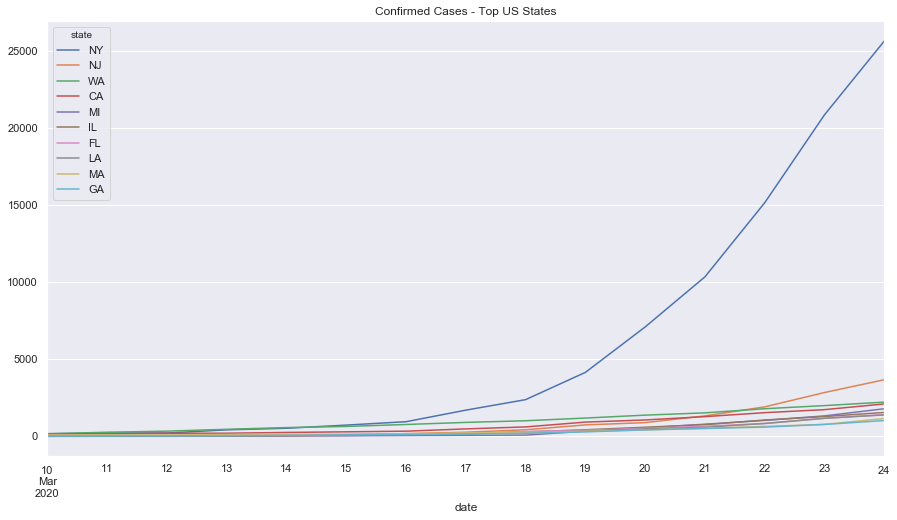

In [13]:
# Chart the top states with confirmed positive
states_positive[states_top].loc['3/10/2020':, :].plot(title='Confirmed Cases - Top US States', figsize=(15,8))

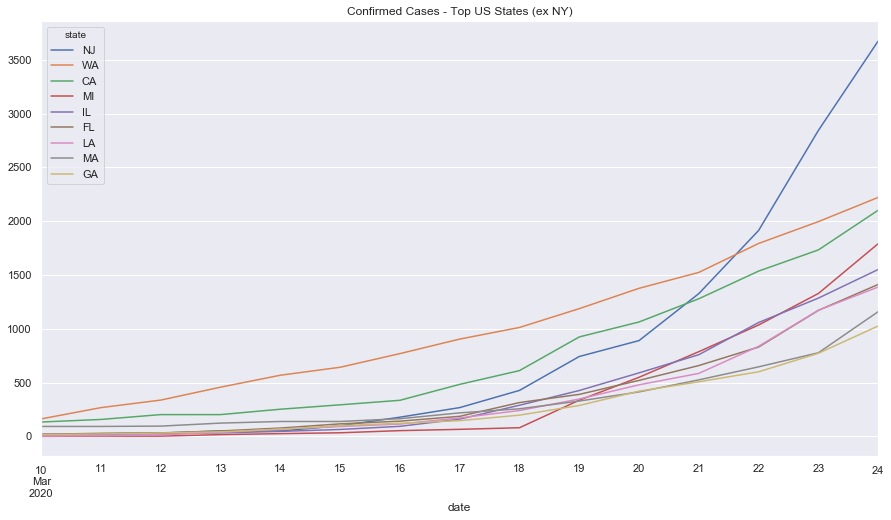

In [14]:
# The same chart but this time without NY to zoom in on the others
states_positive[states_top].loc['3/10/2020':, states_top != 'NY'].plot(title='Confirmed Cases - Top US States (ex NY)', figsize=(15,8))

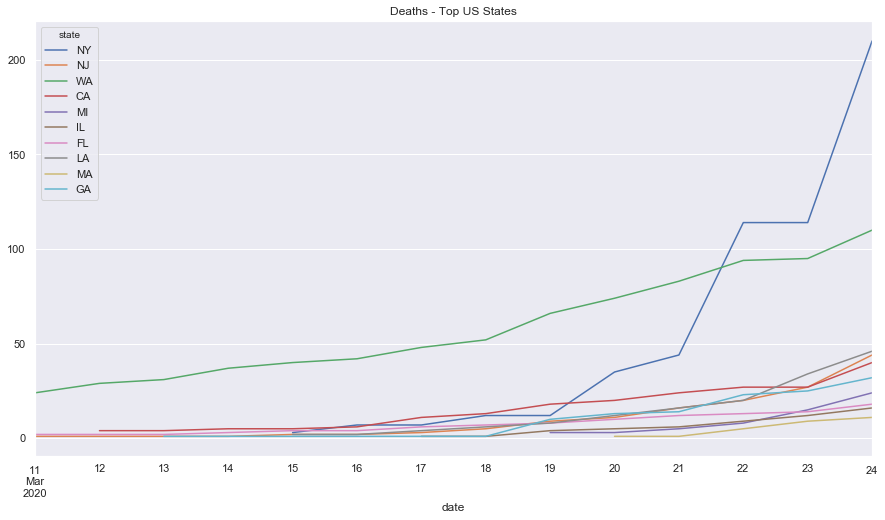

In [15]:
# Chart the top states of those hospitalized
states_deaths[states_top].loc['3/10/2020':, :].plot(title='Deaths - Top US States', figsize=(15,8))